In [1]:
filename = 'wiki'

## Pre-Process

In [2]:
import re
import sys
import codecs
def filter_symbols(input_file, out_file_name):
    p1 = re.compile('（）')
    p2 = re.compile('《》')
    p3 = re.compile('「')
    p4 = re.compile('」')
    p5 = re.compile('<doc (.*)>')
    p6 = re.compile('</doc>')
    outfile = codecs.open(out_file_name, 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub('', line)
            line = p2.sub('', line)
            line = p3.sub('', line)
            line = p4.sub('', line)
            line = p5.sub('', line)
            line = p6.sub('', line)
            outfile.write(line)
    outfile.close()

In [3]:
new_filename = filename + '_filtered';
filter_symbols(filename,new_filename)
filename = new_filename

In [4]:
import hanziconv
def tradition_to_simplify(input_file, out_file_name):
    outfile = codecs.open(out_file_name, 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            outfile.write(hanziconv.HanziConv.toSimplified(line))
    outfile.close()

In [5]:
new_filename = filename + '_simplified';
tradition_to_simplify(filename,new_filename)
filename = new_filename

## Word Cutting

In [8]:
import jieba
import re
def cut(input_file, out_file):
    fn = open(input_file,"r",encoding="utf-8")
    f = open(out_file,"w+",encoding="utf-8")
    line_index = 0
    for line in fn.readlines():
        line_index += 1
        if line_index % 10000 == 0:
            print(line_index)
        words = jieba.cut(line)
        for w in words:
           f.write(str(w) + ' ')
    f.close()
    fn.close()

In [9]:
new_filename = filename + '_cutted';
cut(filename, new_filename)
filename = new_filename

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Mark\AppData\Local\Temp\jieba.cache
Loading model cost 0.953 seconds.
Prefix dict has been built succesfully.


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

10350000
10360000
10370000
10380000
10390000
10400000
10410000
10420000
10430000
10440000
10450000
10460000
10470000
10480000
10490000
10500000
10510000
10520000
10530000
10540000
10550000
10560000
10570000
10580000
10590000
10600000
10610000
10620000
10630000
10640000
10650000
10660000
10670000
10680000
10690000
10700000
10710000
10720000
10730000
10740000
10750000
10760000
10770000
10780000
10790000
10800000
10810000
10820000
10830000
10840000
10850000
10860000
10870000
10880000
10890000
10900000
10910000
10920000
10930000
10940000
10950000
10960000
10970000
10980000
10990000
11000000
11010000
11020000
11030000
11040000
11050000
11060000
11070000
11080000
11090000
11100000
11110000
11120000
11130000
11140000
11150000
11160000
11170000
11180000
11190000
11200000
11210000
11220000
11230000
11240000
11250000
11260000
11270000
11280000
11290000
11300000
11310000
11320000
11330000
11340000
11350000
11360000
11370000
11380000
11390000
11400000
11410000
11420000
11430000
11440000
11450000
1

19460000
19470000
19480000
19490000
19500000
19510000
19520000
19530000
19540000
19550000
19560000
19570000
19580000
19590000
19600000
19610000
19620000


## Modeling using Word2Vec

In [2]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
filename = 'wiki_filtered_simplified_cutted'

In [3]:
import time
s = time.time()
mini_model = Word2Vec(LineSentence(filename), size=100, window=20, min_count=500, workers=4)
e = time.time()
print(e-s)

1128.5030181407928


In [5]:
mini_model.most_similar("说")

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('回答', 0.7153629064559937),
 ('问', 0.7107192873954773),
 ('讲', 0.7076658010482788),
 ('所说', 0.6859928369522095),
 ('你们', 0.6824120879173279),
 ('听', 0.6793612241744995),
 ('以为', 0.6669049263000488),
 ('明白', 0.6656813621520996),
 ('一句', 0.6586386561393738),
 ('知道', 0.6553090810775757)]

In [6]:
mini_model.save('wiki_model')

In [7]:
import gensim

# Load pre-trained Word2Vec model.
old_model = gensim.models.Word2Vec.load("wiki_model")

In [9]:
old_model.most_similar('说')

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('回答', 0.7153629064559937),
 ('问', 0.7107192873954773),
 ('讲', 0.7076658010482788),
 ('所说', 0.6859928369522095),
 ('你们', 0.6824120879173279),
 ('听', 0.6793612241744995),
 ('以为', 0.6669049263000488),
 ('明白', 0.6656813621520996),
 ('一句', 0.6586386561393738),
 ('知道', 0.6553090810775757)]

In [13]:
mini_model.wv["中国"]

array([ 1.6081697 ,  2.3514438 ,  1.1110876 ,  2.4619749 ,  0.8953143 ,
       -0.6623821 ,  1.2496525 ,  0.64503956, -0.5862187 , -0.40853417,
       -3.6084116 , -0.3383523 , -0.02218271,  1.6689447 ,  0.99141455,
       -0.6948997 ,  1.5147134 , -1.303532  ,  1.3380104 ,  0.8355529 ,
       -1.4438851 , -1.0918336 , -2.5468554 ,  2.2704978 ,  1.0806503 ,
        0.38115942, -1.2155311 ,  0.16220753,  0.50544745,  3.6813133 ,
        0.0540157 , -0.6743727 ,  0.6315341 , -1.6587135 ,  1.1861852 ,
       -2.9029696 , -1.407958  ,  1.7874011 , -2.217155  , -2.3481157 ,
        0.3258572 ,  2.300411  , -0.7678653 , -0.9772884 , -0.64945567,
       -0.1981238 , -1.8380064 , -2.524061  , -1.4387846 , -1.4124242 ,
        0.7588973 ,  0.84636545, -1.0830816 ,  0.6134175 ,  2.2162323 ,
        1.8004712 , -2.2026656 , -2.011767  ,  0.7580711 ,  0.37533328,
        2.5699933 ,  1.5509607 ,  1.4866606 ,  0.0087186 , -2.6301432 ,
       -0.7608753 ,  2.9283893 ,  0.11926171,  0.9454624 ,  2.05

## Visualization

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

D:\ProgramFiles\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


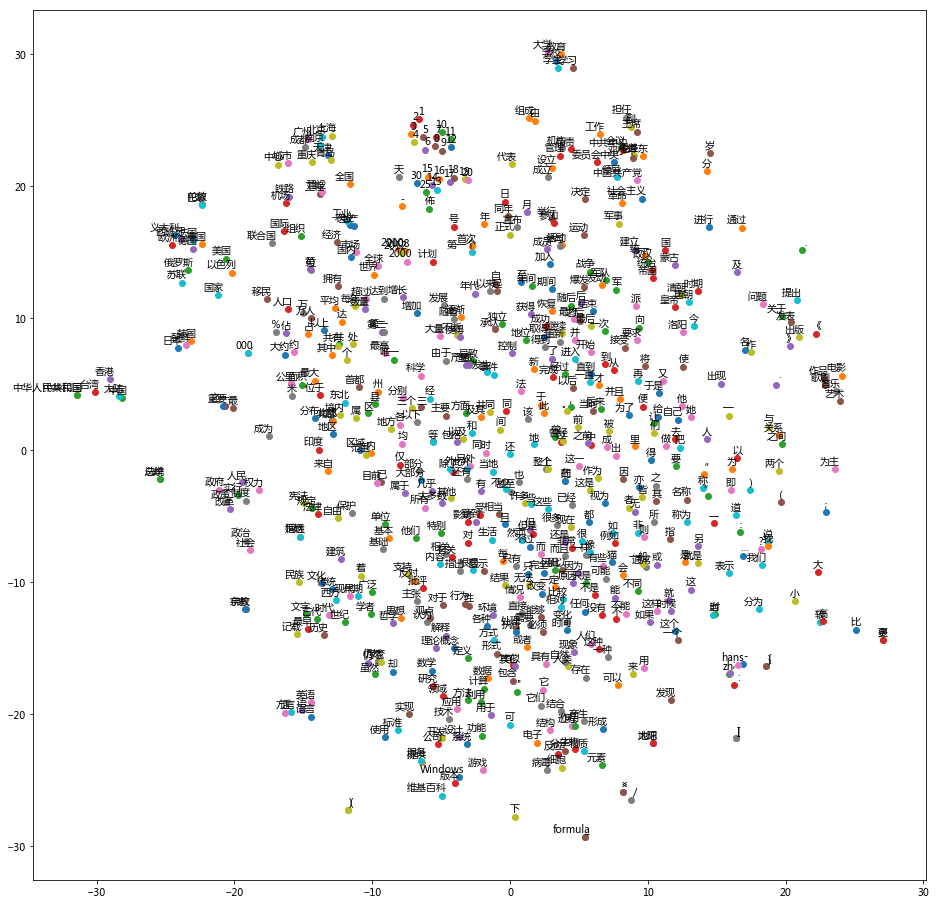

52.23804974555969


In [17]:
import time
s = time.time()
tsne_plot(mini_model)
e = time.time()
print(e-s)